# Introduction



---



In this notebook we aim to explore and maybe answer the following questions:

- How does the Monitor function grow with epsilon?

- Can we get rid of continuation in alpha and replace it by some scaling based in epsilon?

- How does alpha change with epsilon?




---




To do so, we will implement the following test:

a) For each epsilon:

- Compute a B mesh
- Compute the exact solution $u(x)$
- Compute the functional of $u(x)$ used in $M$: $ \left|\frac{d^2u}{dx^2} \right|$
- Compute L1 norm of the functional as $\int u(x) |J_x| \, dx $
- Plot results

b) Plot L1 norms vs. Epsilon



---



# Results and Comments

- This notebook shows us that the L1 norm of $|u''|$ behaves like $\frac{1}{\epsilon}.$ Thus, $|u''|$ behaves like $\frac{1}{\epsilon^2}.$

- To see this, note that the L1 norm of $|u''|$ is $$ \text{L1 Norm} = \text{width} \times |u''|  \approx \frac{1}{\epsilon}.$$
$$ (\text{width} = \epsilon)  \times |u''|  \approx \frac{1}{\epsilon}.$$
For this to be true, $$ | u'' | \approx \frac{1}{\epsilon^2}.$$

In [ ]:
# install firedrake

# hide output
%%capture

# try:
#     import firedrake
# except ImportError:
#     !wget "https://fem-on-colab.github.io/releases/firedrake-install-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
#     import firedrake


try:
    from firedrake import *
except ImportError:
    !wget "https://fem-on-colab.github.io/releases/firedrake-install-release-real.sh" -O "/tmp/firedrake-install.sh" && bash "/tmp/firedrake-install.sh"
    from firedrake import *

In [ ]:
# Code in this cell makes plots appear an appropriate size and resolution in the browser window

%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (11, 6)

In [ ]:
# import firedrake tools

from firedrake import *
import numpy as np
import matplotlib.pyplot as plt # firedrake makes use of matplotlib tools
from firedrake.pyplot import tripcolor, tricontour, triplot #firedrake plotting
from IPython.display import display
from mpl_toolkits import mplot3d



# Setup

In [ ]:
# SETUP

# Mesh and space
N = 50
xi_mesh = UnitIntervalMesh(N)
V = FunctionSpace(xi_mesh, 'CG', 2)
x = Function(V).interpolate(SpatialCoordinate(xi_mesh)[0])
perm_x =  np.argsort(x.dat.data[:])

# For M
p = Constant(2)
q = Constant(2)
m = Constant(0)
exp_M = (2*q) / (1 + q*(2-m))

# B Mesh Function

In [ ]:
# FUNCTION FOR B MESH

def bak_mesh(NB, eps_B, q = 0.4, sigma = 2.5, b = 1, error = 1):


    a = sigma/b
    tau = q-a*eps_B



    while error>1e-14:

      g2 = a*eps_B*(0.5-tau)-(0.5+a*eps_B*np.log(1-tau/q))*(q-tau)
      g2_tau = 1 + a*eps_B*np.log(1-tau/q)
      tau_new =tau-g2/g2_tau
      error = abs(tau-tau_new)
      tau=tau_new


    if tau>0:

      phi = -a*eps_B*np.log(1-tau/q)
      phi_tau = a*eps_B/(q-tau)
      x_uni = np.linspace(0, 1, NB+1)
      x_b = np.zeros(NB+1)

      for i in range(1,int(NB/2+1)):
        if x_uni[i]<tau:
          x_b[i] = -a*eps_B*np.log(1-x_uni[i]/q)
        else:
          x_b[i] = -a*eps_B*np.log(1-tau/q)+(x_uni[i]-tau)*phi_tau

      for i in range(int(NB/2+1),NB+1):
        x_b[i] = 1-x_b[NB-i]


    else:

      x_b = np.linspace(0, 1, NB+1)


    return x_b

# Exact u and functional function

In [ ]:
# FUNCTION FOR EXACT U AND FUNCTIONAL

def u_exact(x, eps):


    # COMPUTE EXACT U ON X MESH

    top = (1 - exp(1 - 1/eps))*exp(-x/eps) + (exp(1) - exp(-1/eps))*exp((x-1)/eps)
    bottom = (eps**2 - 1) * ( 1 - exp(-2/eps) )
    sub = exp(x)/(eps**2 - 1)
    u_e = top/bottom - sub



    # COMPUTE THE FUNCTIONAL OF EXACT U

    # Compute u'
    jacobx = x.dx(0)
    upr_f = (1/jacobx) * u_e.dx(0)
    # Compute u''
    u_pr_xi = u_e.dx(0)
    u_prpr_xi = u_pr_xi.dx(0)
    x_prpr_xi = jacobx.dx(0)
    u_prpr = ( u_prpr_xi -  upr_f * x_prpr_xi) * (( 1/jacobx )**2)
    # Compute abs(u'')
    functional = abs(u_prpr)


    return u_e, functional



# The Numerical Test

____________________________________________________________________________________________________

Epsilon =  0.05

____________________________________________________________________________________________________

Size of L2 norm of u is 1.6150208616213972




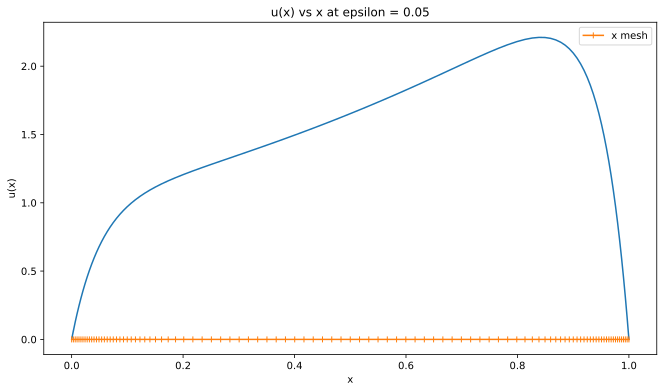

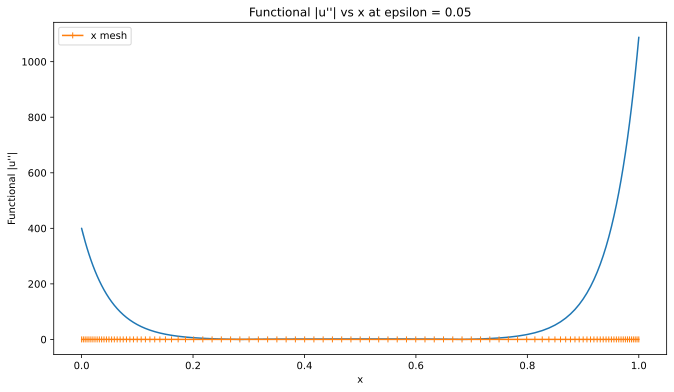

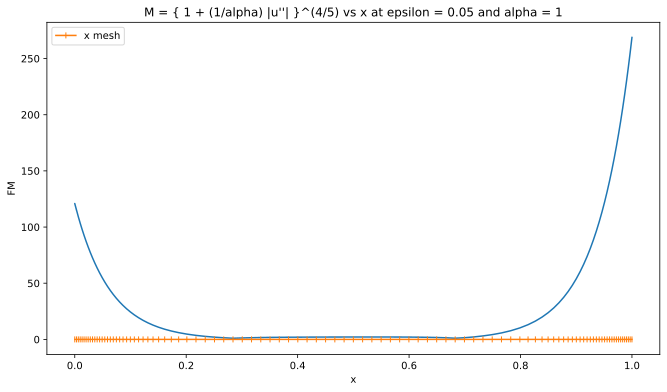



L1 norm of functional =  75.19149279398776

____________________________________________________________________________________________________

Epsilon =  0.025

____________________________________________________________________________________________________

Size of L2 norm of u is 1.7003759251274675




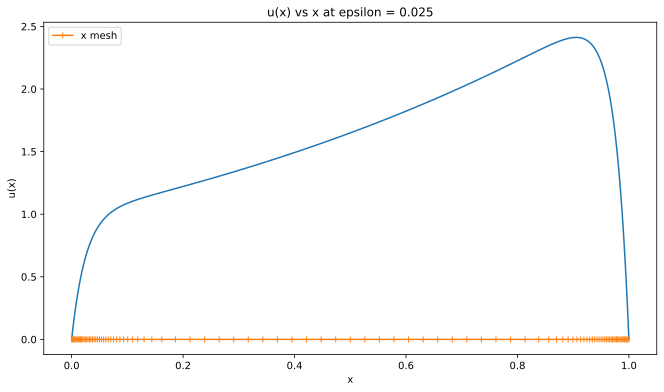

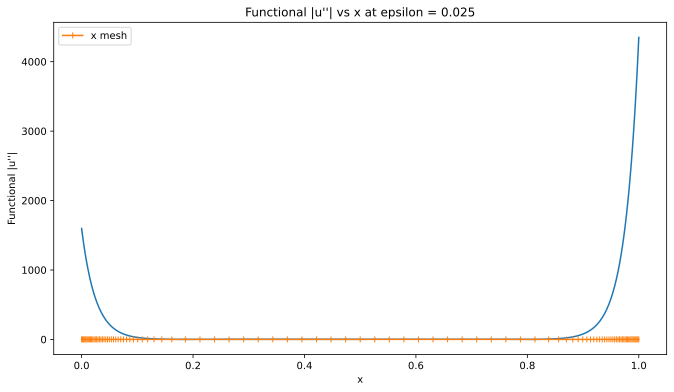

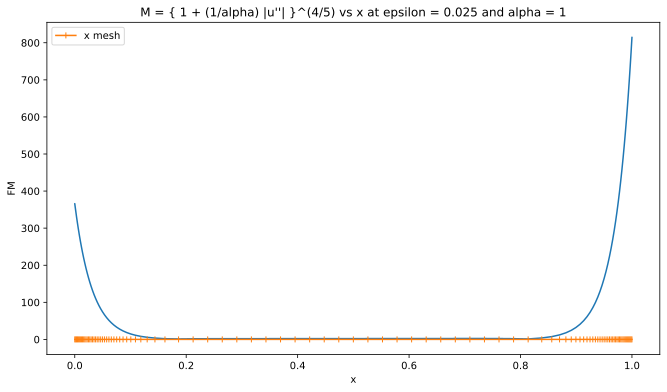



L1 norm of functional =  151.80956008262146

____________________________________________________________________________________________________

Epsilon =  0.0125

____________________________________________________________________________________________________

Size of L2 norm of u is 1.7436015319901534




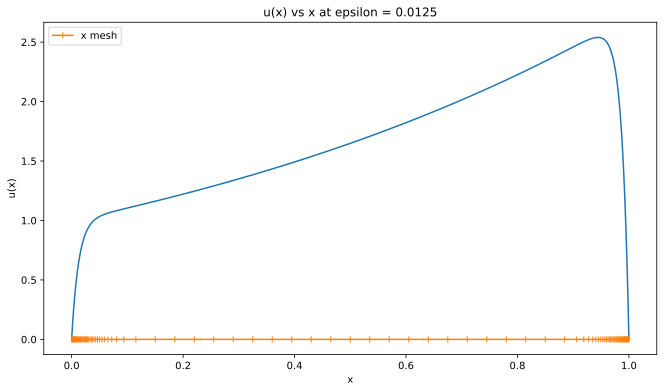

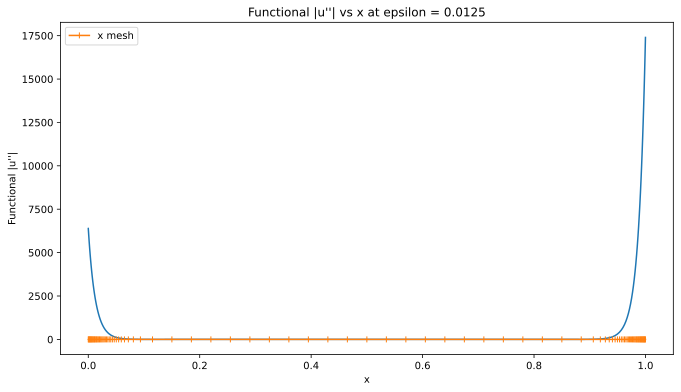

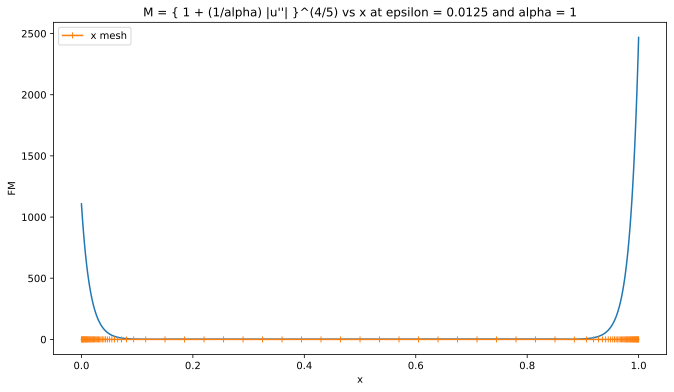



L1 norm of functional =  303.8833528772893

____________________________________________________________________________________________________

Epsilon =  0.00625

____________________________________________________________________________________________________

Size of L2 norm of u is 1.7653947703326103




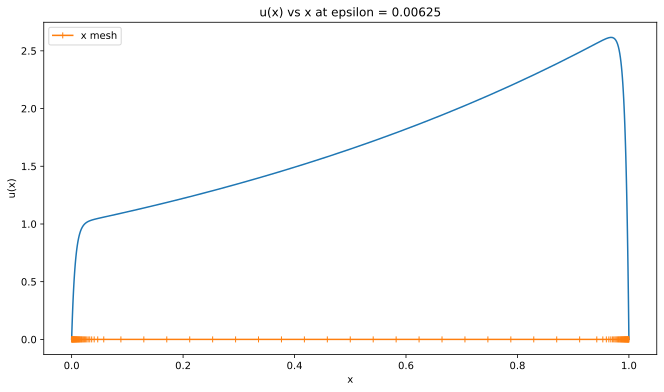

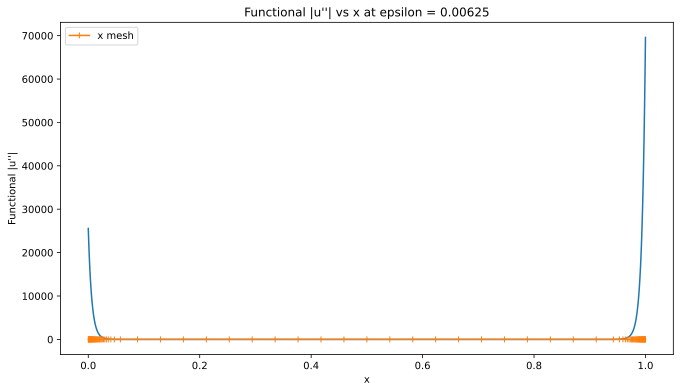

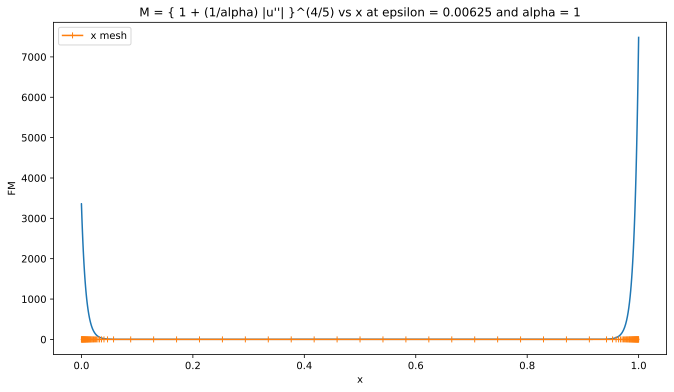



L1 norm of functional =  607.2456017192798

____________________________________________________________________________________________________

Epsilon =  0.003125

____________________________________________________________________________________________________

Size of L2 norm of u is 1.7763417597970577




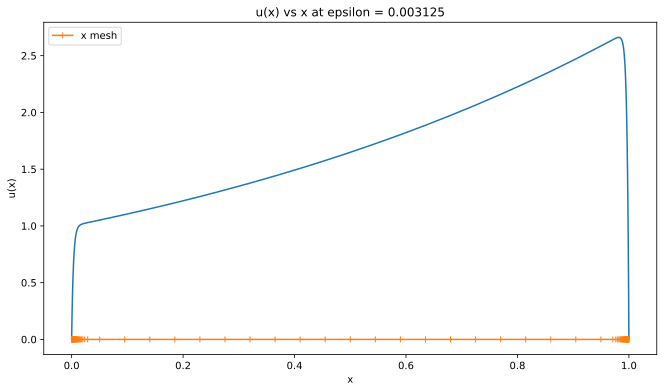

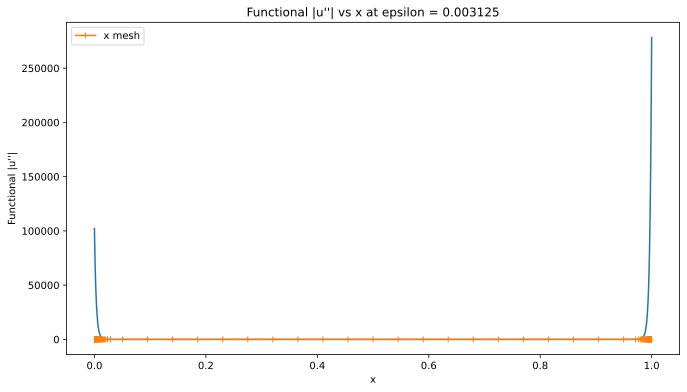

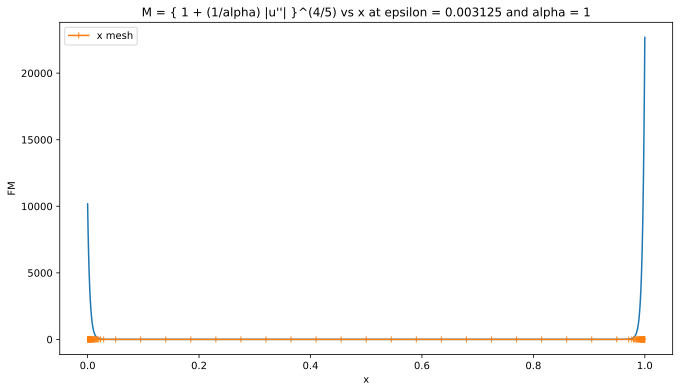



L1 norm of functional =  1213.5767299459776

____________________________________________________________________________________________________

Epsilon =  0.0015625

____________________________________________________________________________________________________

Size of L2 norm of u is 1.7818285007674375




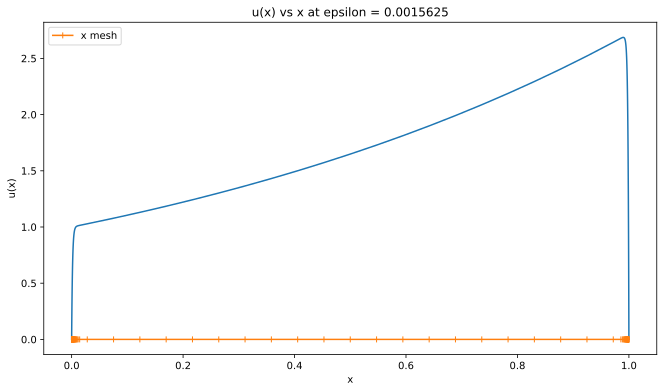

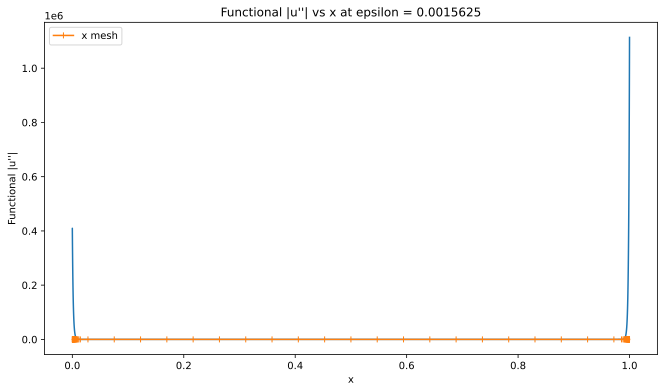

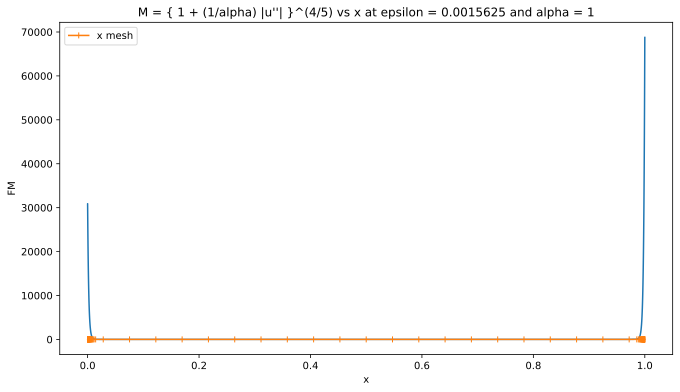



L1 norm of functional =  2426.369380358848

____________________________________________________________________________________________________

Epsilon =  0.00078125

____________________________________________________________________________________________________

Size of L2 norm of u is 1.784575262684014




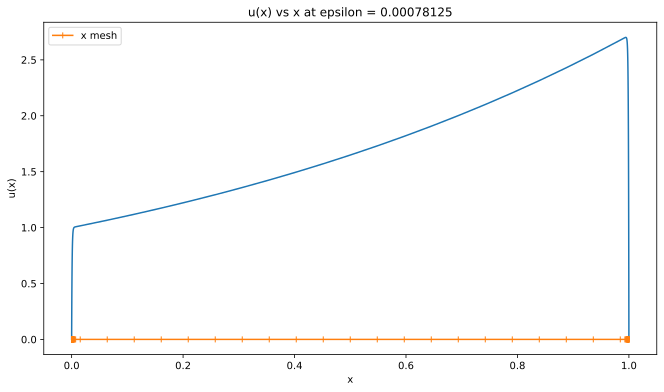

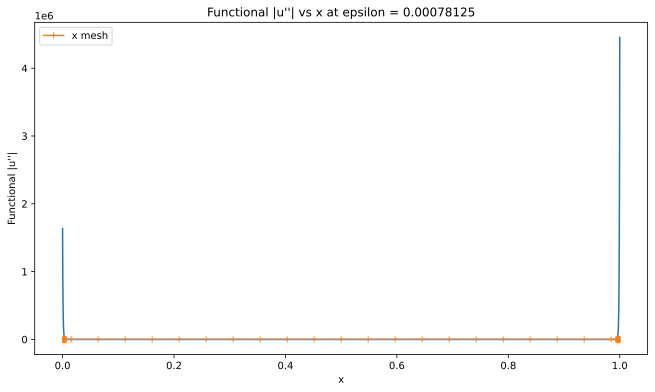

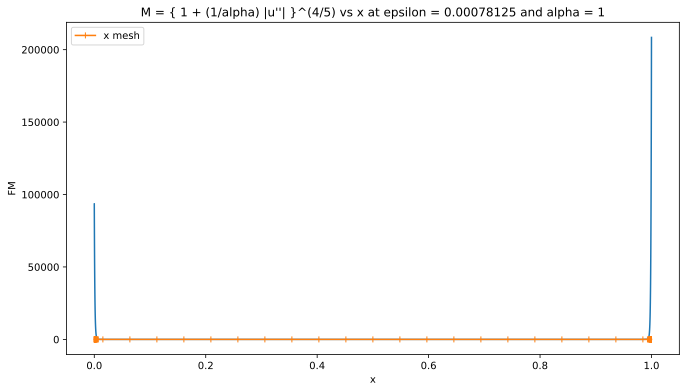



L1 norm of functional =  4852.497821557807

____________________________________________________________________________________________________

Epsilon =  0.000390625

____________________________________________________________________________________________________

Size of L2 norm of u is 1.7859494979749173




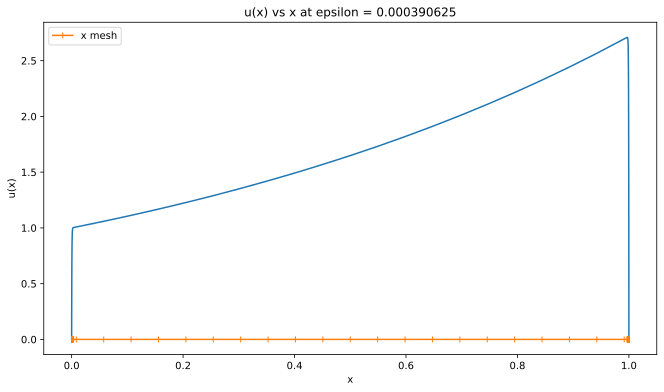

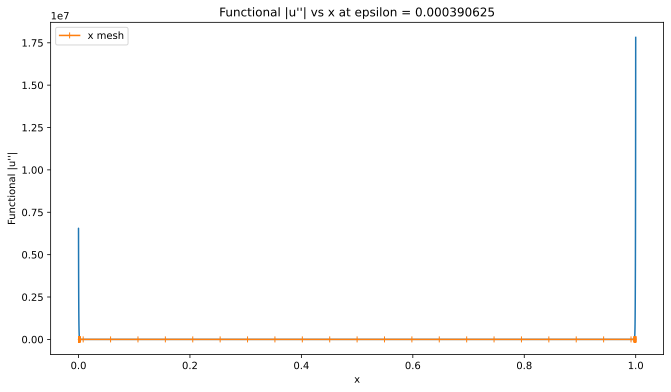

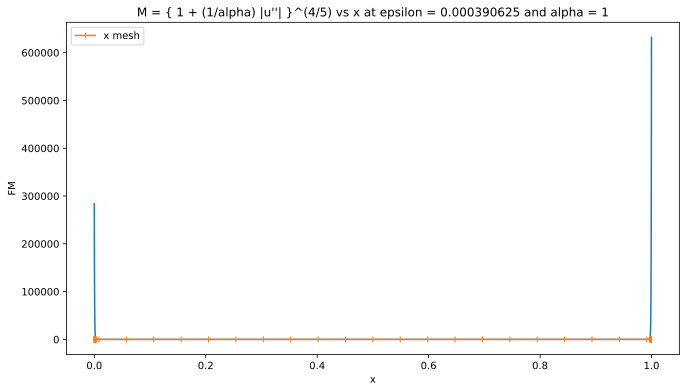



L1 norm of functional =  9706.17788588769

____________________________________________________________________________________________________

Epsilon =  0.0001953125

____________________________________________________________________________________________________

Size of L2 norm of u is 1.786636826570664




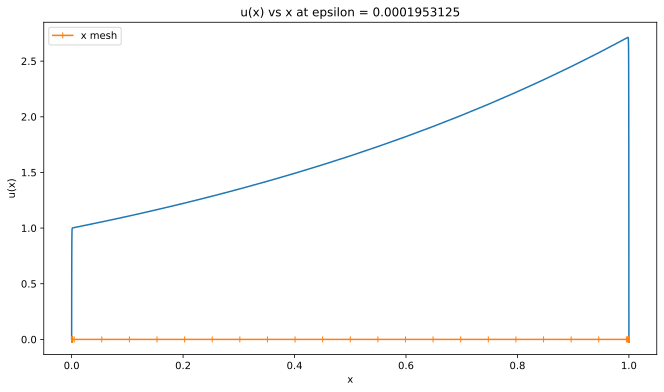

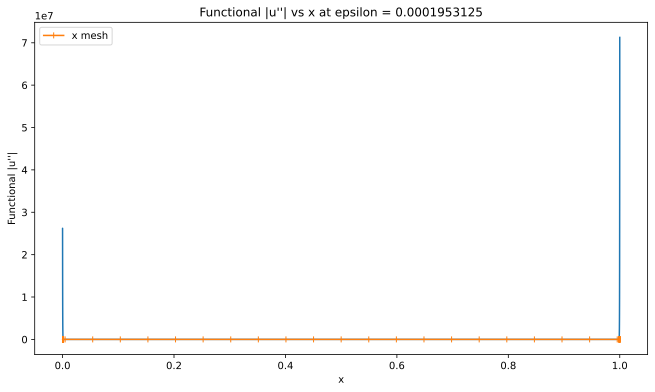

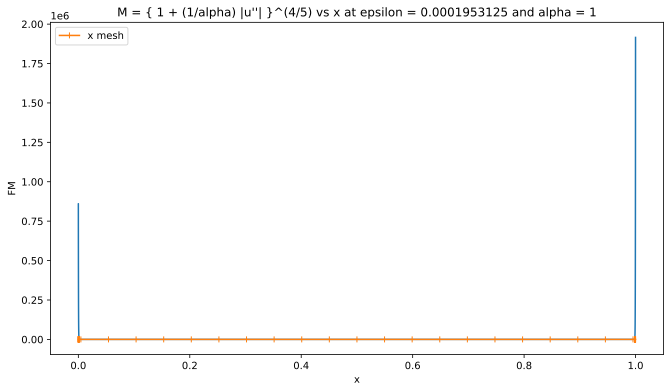



L1 norm of functional =  19416.896850630343

____________________________________________________________________________________________________

Epsilon =  9.765625e-05

____________________________________________________________________________________________________

Size of L2 norm of u is 1.7869805406079533




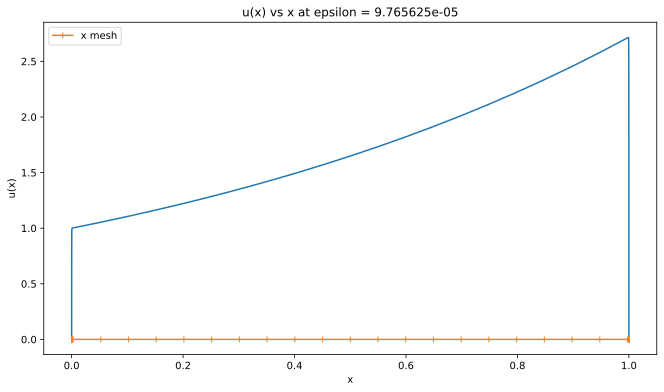

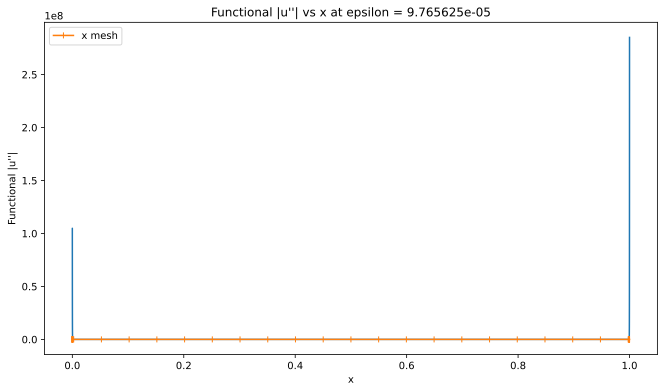

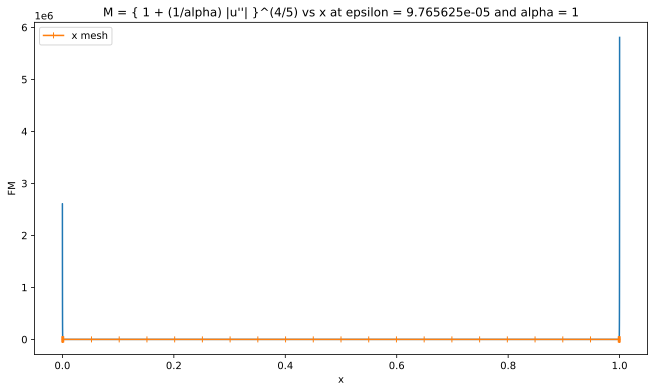



L1 norm of functional =  38845.97214346752


_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-

Results

_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-_-



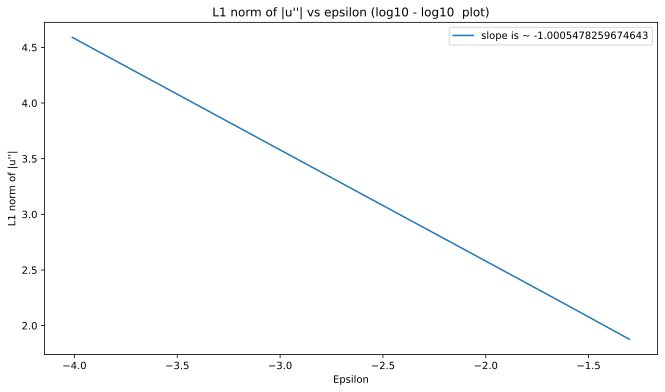

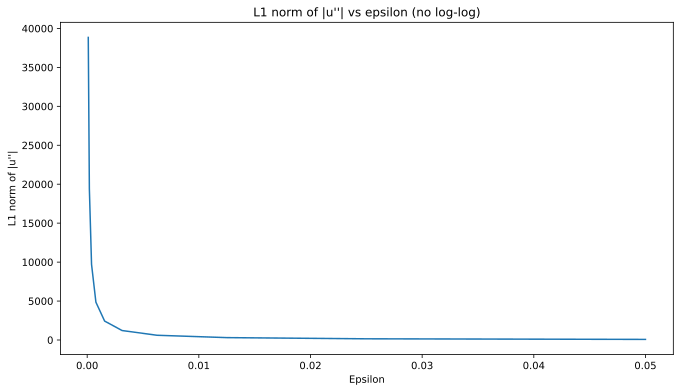

In [ ]:
epsilon_list = [0.1 * (2**i) for i in range(-1, -11, -1)]
L1_norm_list = []

for epsilon in epsilon_list:


    print('_'*100)
    print()
    print('Epsilon = ', epsilon)
    print()
    print('_'*100)
    print()


    # COMPUTE A B MESH

    NB = 2*N

    bak_array = bak_mesh(NB, eps_B = epsilon)

    x.dat.data[:] = bak_array[:]



    # COMPUTE FUNCTIONAL

    u_sol, abs_u_prpr = u_exact(x, eps = epsilon)


    # COMPUTE M
    Jx = x.dx(0)
    alpha = 1
    # alpha_term1 = float(alpha_hat * sqrt(assemble(u_sol*u_sol* Jx * dx)))
    M = ( 1 + (1/alpha) * abs_u_prpr )**exp_M

    print('Size of L2 norm of u is', sqrt(assemble(u_sol*u_sol* Jx * dx)))
    print()
    print()



    # PLOT EXACT U

    plt.plot(x.dat.data[perm_x], Function(V).interpolate(u_sol).dat.data[perm_x])
    plt.plot(x.dat.data[perm_x], [0 for i in range(len(x.dat.data[perm_x]))], marker = "|",  label = "x mesh")
    plt.xlabel('x')
    plt.ylabel("u(x)")
    plt.title("u(x) vs x at epsilon = " + str(epsilon))
    plt.legend()
    plt.show()
    print()
    print()



    # PLOT THE FUNCTIONAL

    plt.plot(x.dat.data[perm_x], Function(V).interpolate(abs_u_prpr).dat.data[perm_x])
    plt.plot(x.dat.data[perm_x], [0 for i in range(len(x.dat.data[perm_x]))], marker = "|",  label = "x mesh")
    plt.xlabel('x')
    plt.ylabel("Functional |u''|")
    plt.title("Functional |u''| vs x at epsilon = " + str(epsilon))
    plt.legend()
    plt.show()
    print()
    print()


    # PLOT M

    plt.plot(x.dat.data[perm_x], Function(V).interpolate(M).dat.data[perm_x])
    plt.plot(x.dat.data[perm_x], [0 for i in range(len(x.dat.data[perm_x]))], marker = "|", label = "x mesh")
    plt.xlabel('x')
    plt.ylabel('FM')
    plt.title("M = { 1 + (1/alpha) |u''| }^(4/5) vs x at epsilon = "+ str(epsilon) + ' and alpha = ' + str(alpha))
    plt.legend()
    plt.show()
    print()
    print()




    # TAKE L1 NORM OF FUNCTIONAL - Integral( functional * |Jx| * dxi)

    Jx = x.dx(0)
    L1_norm = assemble( abs_u_prpr * abs(Jx) * dx )

    print('L1 norm of functional = ', L1_norm)
    print()

    # SAVE RESULT

    L1_norm_list.append(L1_norm)





# PLOT THE RESULTS

print()
print('_-'*100)
print()
print('Results')
print()
print('_-'*100)
print()


slope, intercept = np.polyfit(np.log10(epsilon_list), np.log10(L1_norm_list), 1)
plt.plot(np.log10(epsilon_list), np.log10(L1_norm_list), label = "slope is ~ " + str(slope))
plt.xlabel('Epsilon')
plt.ylabel("L1 norm of |u''|")
plt.title("L1 norm of |u''| vs epsilon (log10 - log10  plot)")
plt.legend()
plt.show()
print()
print()

plt.plot(epsilon_list, L1_norm_list)
plt.xlabel('Epsilon')
plt.ylabel("L1 norm of |u''|")
plt.title("L1 norm of |u''| vs epsilon (no log-log)")
plt.show()



